# Import libraries

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

# The method

The bisection method works based on the intermediate value theorem: 

- If $f(x)$ is a continuous function, on the interval $I$, $a$ and $b$ are two points in $I$, and $f(a) \le c \le f(b)$ then there exists a number $\zeta$ in $[a, b]$, such that $f(\zeta)=c$.

Using this theorm we can set $c=0$ in order to find the roots of a function. To implement this function two initial guesses $(a, b)$ must be chosen. Then the first approximation to the root is the midpoint of the interval $(a, b)$, i.e., 

$$x_{0}=\frac{a+b}{2}$$

Since we are searching for the root we can analyze how close the approximation is by evaluating $f(a)f(x_{0})<0$, i.e.,

- If $f(a)f(x_{0})<0$ is true, the root will lie in the interval $(a, x_{0})$ and therefore we can set $b$ equal to $x_{0}$.

- If $f(a)f(x_{0})<0$ is false, the root will lie in the interval $(x_{0}, b)$ and therefore we can set $a$ equal to $x_{0}$.

This process can be repeated for $n$ interations generating the sequence $x_{0}, x_{1}, x_{2}...x_{n}$. The sequence is generated until the last approximation $x_{n}$ is up to the desired accuracy.


In [2]:
def bisect_method(iterations, f, initial_a, initial_b):
    
    # random initial guesses 
    a = initial_a
    b = initial_b
    
    # lists to store the results
    ri = []
    rx = []
    rfx = []
    
    # iterate
    for i in range(iterations):
        
        # calculate the next x using as the midpoint of the current interval
        x = midpoint(a, b)
        
        # store results
        ri.append(i)
        rx.append(x)
        rfx.append(f(x))
        
        # evaluate approximation over/underestimate
        if (f(a) * f(x)) < 0:
            
            b = x
            
        else :
            
            a = x
    
    return ri, rx, rfx


def midpoint(a, b):
    
    # midpoint interval (a, b)
    x = (a + b) / 2
    
    return x

# Example Function

Here we can demonstrate this method by finding the root of the function: $f(x)=x^{3}-4x-9$.

We can start by choosing initial guesses $a=2$ and $b=3$

In [6]:
# example f(x)
def f(x):
    
    y = x**3 - (4 * x) - 9
    
    return y

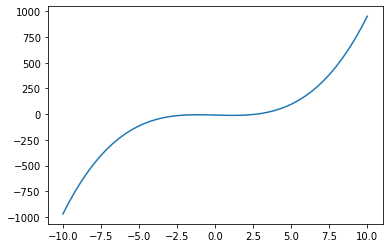

In [27]:
# plot full function on the interval (-10, 10)
fig, ax = plt.subplots(1,1)
x = np.linspace(-10, 10)
ax.plot(x, f(x))
plt.show()

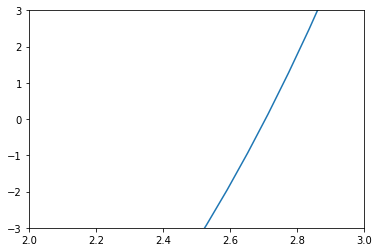

In [26]:
# say we are interested in initial guesses (2, 3)
a = 2
b = 3

# we can see this interval contains a root
fig, ax = plt.subplots(1,1)
x = np.linspace(a-1, b+1)
ax.plot(x, f(x))
ax.set_xlim(2, 3)
ax.set_ylim(-3, 3)
plt.show()

# but we dont know exactly what this root is

# Implementation 

In [30]:
# then we can use this bisection method to approximate that root

ri, rx, rfx = bisect_method(20, f, a, b)

# Analysis

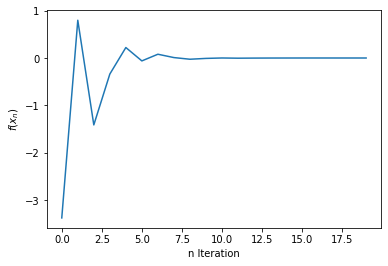

In [51]:
# for this specific example we can see that our appriximation converges in less than 20 iterations.
ax = plt.axes()
ax.plot(ri, rfx)
ax.set_xlabel('n Iteration')
ax.set_ylabel('$f(x_{n})$')
plt.show()

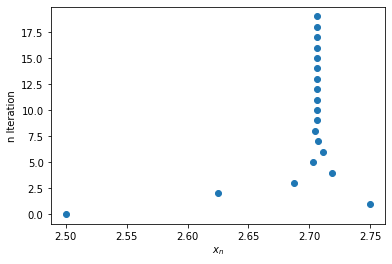

In [52]:
# we can also observe how the value of x converges onto the root value
ax = plt.axes()
ax.scatter(rx, ri)
ax.set_ylabel('n Iteration')
ax.set_xlabel('$x_{n}$')
plt.show()

# Error

If we assume $\zeta$ to be the exact root of the funtion $f(x)=0$ and initial approximations $a$ and $b$, then the aboslute error can be described by the sequence:

$$|x_{0}-\zeta| \le \frac{b-a}{2}$$


$$|x_{1}-\zeta| \le \frac{b-a}{2^{2}}$$

$$\vdots$$

$$|x_{n}-\zeta| \le \frac{b-a}{2^{n-1}}$$

If the error of the $n$th approximation ($\epsilon_{n}$) can be written as $\epsilon_{n} = \zeta - x_{n}$. Therefore, to find the minimum number of iterations to achieve a permissable error, we use the formula 

$$n \ge \frac{ln(b-a)-ln(\epsilon)}{ln(2)}-1$$

In [64]:
def min_iterations(a, b, error):
    # permissible error
    e = error
    
    # calculate minimum iterations
    n = ((np.log(b-a) - np.log(e)) / np.log(2)) - 1
    
    return round(n)

In [63]:
# we see permissible error is reached approximately after 7 iterations
min_iterations(2, 3, 0.005)

7